In [11]:
# CS 178 - Homework 4
# Jaclyn LaMorte
# 25176344

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# Part 1
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

for x in xrange(0,14):
    print "Feature", x
    print "min: ", min(X[:, x])
    print "max: ", max(X[:, x])
    print "mean: ", np.mean(X[:, x])
    print "var: ", np.var(X[:, x])

Feature 0
min:  193.5
max:  253.0
mean:  241.6011037
var:  83.4991711498
Feature 1
min:  152.5
max:  249.0
mean:  227.3765713
var:  92.625593125
Feature 2
min:  214.25
max:  252.5
mean:  241.5541505
var:  35.2863398033
Feature 3
min:  152.5
max:  252.5
mean:  232.82676815
var:  97.6257317486
Feature 4
min:  10.0
max:  31048.0
mean:  3089.923365
var:  15651513.7564
Feature 5
min:  0.0
max:  13630.0
mean:  928.25902
var:  3081761.81695
Feature 6
min:  0.0
max:  9238.0
mean:  138.09383
var:  443951.746446
Feature 7
min:  0.0
max:  125.17
mean:  3.2485793303
var:  8.21948502491
Feature 8
min:  0.87589
max:  19.167
mean:  6.49865290275
var:  6.40504819136
Feature 9
min:  0.0
max:  13.23
mean:  2.09713912048
var:  4.36344047061
Feature 10
min:  0.0
max:  66.761
mean:  4.21766040935
var:  4.08637188423
Feature 11
min:  0.0
max:  73.902
mean:  2.69171845215
var:  2.19877847436
Feature 12
min:  0.99049
max:  975.04
mean:  10.2715904759
var:  404.646245041
Feature 13
min:  -999.9
max:  797.2
mea

In [20]:
# Part 2
Xtr = X[:10000]
Ytr = Y[:10000]
Xva = X[10000:20000]
Yva = Y[10000:20000]

learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)

print "Training Error: ", learner.err(Xtr, Ytr)
print "Validation Error: ", learner.err(Xva, Yva)

Training Error:  0.0057
Validation Error:  0.3745


In [25]:
# Part 3
depths = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
trainingError = np.zeros(np.size(depths))
validationError = np.zeros(np.size(depths))

for x in depths:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = x)
    trainingError[x] = learner.err(Xtr, Ytr)
    validationError[x] = learner.err(Xva, Yva)
    
print trainingError
print validationError

[ 0.3458  0.3234  0.3165  0.3094  0.307   0.3034  0.2972  0.2883  0.2804
  0.2686  0.2577  0.2438  0.2299  0.2119  0.1988  0.1832]
[ 0.3364  0.3191  0.3124  0.3105  0.312   0.3104  0.3065  0.3049  0.3131
  0.3117  0.3225  0.3195  0.3286  0.3351  0.3356  0.3321]


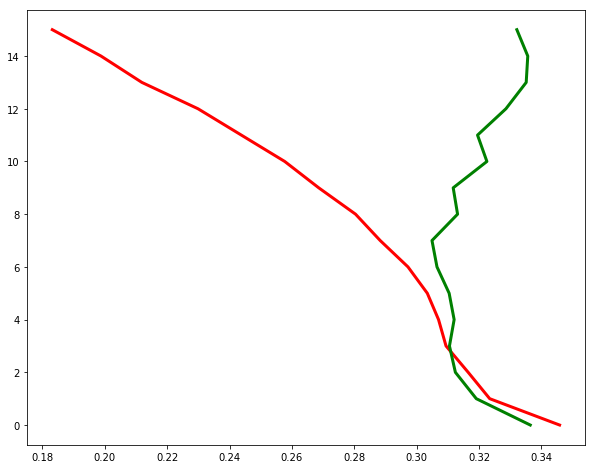

In [30]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(trainingError, depths, 'r-', lw = 3, label='Training')
ax.plot(validationError, depths, 'g-', lw = 3, label='Validation')

plt.show()

# Models with higher maxDepth have higher complexity. I think that 6 has the best decision
# tree model for both training and validation error.

In [34]:
# Part 4
minParent = [4,8,16,32,64,128,256,512,1024,2048,4096]
trainingError = np.zeros(np.size(minParent))
validationError = np.zeros(np.size(minParent))

counter = 0
for x in minParent:
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent = x, maxDepth = 50)
    trainingError[counter] = learner.err(Xtr, Ytr)
    validationError[counter] = learner.err(Xva, Yva)
    counter = counter + 1
    
print trainingError
print validationError

[ 0.0251  0.063   0.1162  0.171   0.2188  0.2562  0.2856  0.2936  0.3114
  0.3207  0.3234]
[ 0.3783  0.3755  0.3678  0.364   0.351   0.3319  0.3205  0.3137  0.3145
  0.3182  0.3191]


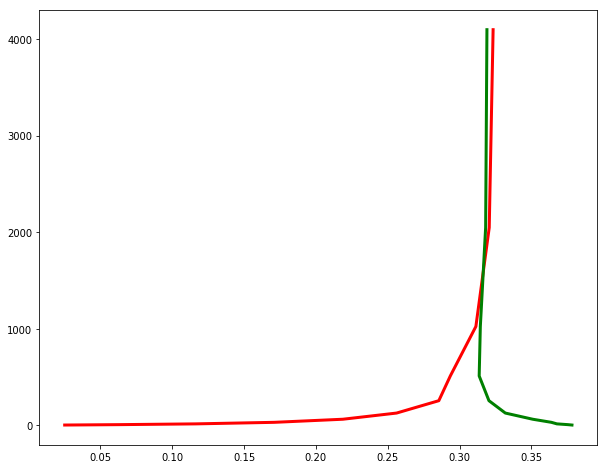

In [38]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(trainingError, minParent, 'r-', lw = 3, label='Training')
ax.plot(validationError, minParent, 'g-', lw = 3, label='Validation')

plt.show()

# It appears that as minParent goes up, there is actually less complexity.
# It looks like around 1024 is the best minParent

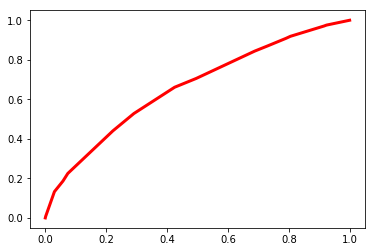

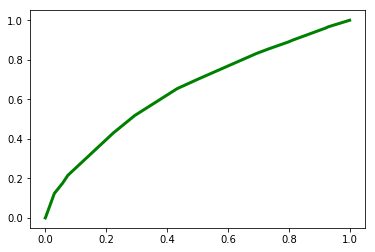

In [49]:
# Part 5
learner = ml.dtree.treeClassify(Xtr, Ytr, minParent = 1024, maxDepth=6)
plt.plot(learner.roc(Xtr, Ytr)[0], learner.roc(Xtr, Ytr)[1], 'r-', lw = 3)
plt.show()
plt.plot(learner.roc(Xva, Yva)[0], learner.roc(Xva, Yva)[1], 'g-', lw = 3)
plt.show()

In [50]:
print "Training AUC: ", learner.auc(Xtr, Ytr)
print "Validation AUC: ", learner.auc(Xva, Yva)

Training AUC:  0.663955654074
Validation AUC:  0.652519828428


In [51]:
# Part 6
learner = ml.dtree.treeClassify(X, Y, minParent = 1024, maxDepth=6)
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

# Kaggle Username: thatnerfherder
# Leaderboard AUC: .67184

# I, Jaclyn LaMorte, am the only one who worked on this assignment. I used Piazza
# for discussion of any questions I had about the assignment.